In [8]:
import os
import h5py
import numpy as np
print(os.getcwd())
basename='../../../NEON/raw_data/ABBY/NEON.D16.ABBY.IP0.00200.001.ecte.2018-07-'
in_file_path='/ABBY/dp0p/data/soni/000_050/'
in_file_pathq='/ABBY/dp0p/data/irgaTurb/000_050/'
temp_raw=[]
q_raw  = []
time_raw=[]
for i in range(1,2):
    if i<10:
        name=basename+'0'+str(i)+'.l0p.h5'
    else:
        name=basename+str(i)+'.l0p.h5'
    print(name)
    fp2=h5py.File(name,'r')
    q_raw.extend(fp2[in_file_pathq]['rtioMoleDryH2o'][:])
    temp_raw.extend(fp2[in_file_path]['tempSoni'][:])
    time_raw.extend(fp2[in_file_path]['time'][:])
rTemp=np.array(temp_raw)-273
rQ = np.array(q_raw)

/stor/soteria/hydro/private/tsw35/data/eddy_v2/neon_code/tests
../../../NEON/raw_data/ABBY/NEON.D16.ABBY.IP0.00200.001.ecte.2018-07-01.l0p.h5


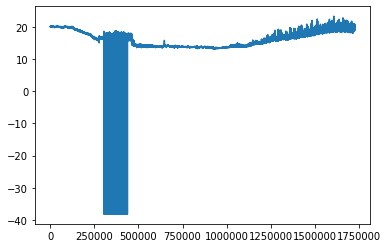

In [86]:
plt.plot(rTemp)

In [91]:
st=15000+4*(20*60*30)
extra=0
tempslice=rTemp[st-extra:st+20*60*30+extra]
qslice=rQ[st-extra:st+20*60*30+extra]
tmask = (~np.isnan(tempslice))&(~np.isnan(qslice))&(tempslice>0)&(qslice>0)
tslice=tempslice[tmask]
qslice=qslice[tmask]

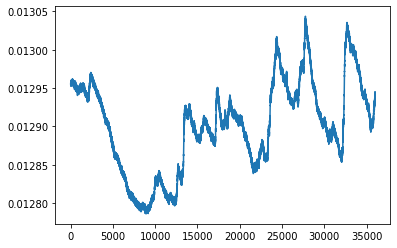

In [92]:
plt.plot(qslice)

In [93]:
import matplotlib.pyplot as plt

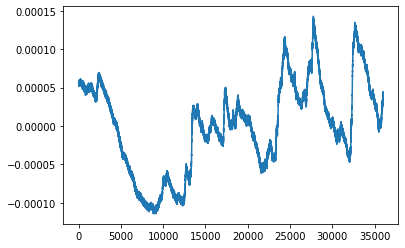

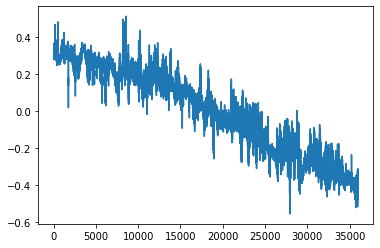

In [94]:
plt.plot(qslice-np.mean(qslice))
plt.figure()
plt.plot(tslice-np.mean(tslice))

-0.4443064221012947


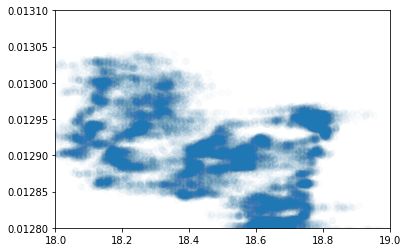

In [137]:
plt.scatter(tslice,qslice,alpha=.02)
plt.xlim(18,19)
plt.ylim(.0128,.0131)
print(np.cov(tslice,qslice)[0][1]/np.std(tslice)/np.std(qslice))

(10, 24)

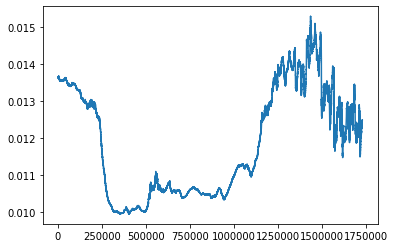

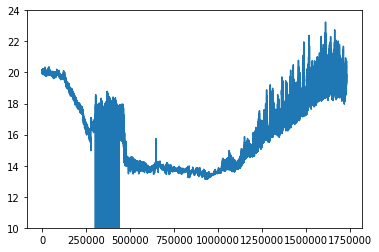

In [96]:
plt.plot(rQ)
plt.figure()
plt.plot(rTemp)
plt.ylim(10,24)

In [46]:
def cov2(x,y):
    xm=np.mean(x)
    ym=np.mean(y)
    return np.sum((x-xm)*(y-ym))/len(x)

0.5984915932661679
7.951119119624147e-06

0.7165642380558908
1.3282749739559133e-05

0.9096372335181682
0.00015557073636927242

-0.05173616667276507
-6.569045420014033e-06

-0.9173123759606632
-5.347111292293717e-05

0.6908934681408104
2.59315806391199e-06

0.010866623277488052
1.2706280909779718e-07

-0.17864153372597727
-1.6065794861427004e-06

0.2880998664428701
8.89153191710801e-06

0.014334734152484726
-8.728602199659039e-08

-0.33828795653813215
-1.0210848433387855e-05

-0.04826327790149001
-6.904128644403918e-07

0.3267742225425042
1.6301338446227497e-06

-0.36854939036685314
-4.826195870539312e-06

-0.5370244948558288
-1.0244657988807484e-06

0.07972759649804538
6.773490512481415e-07



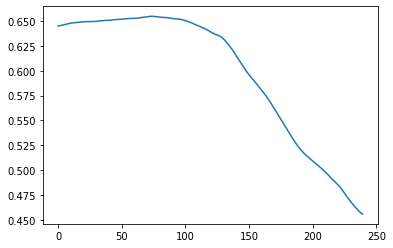

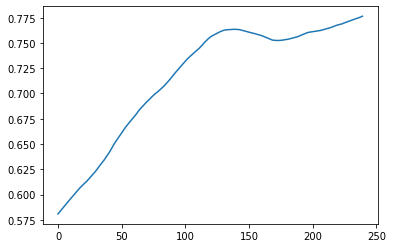

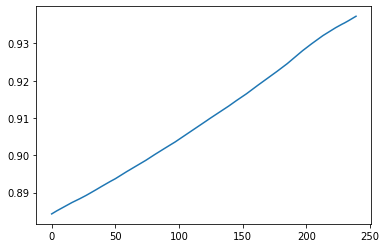

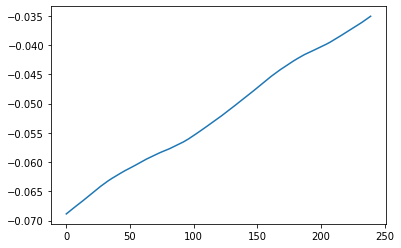

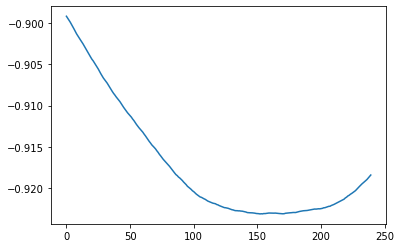

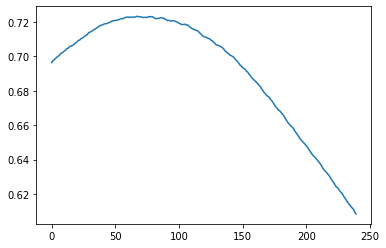

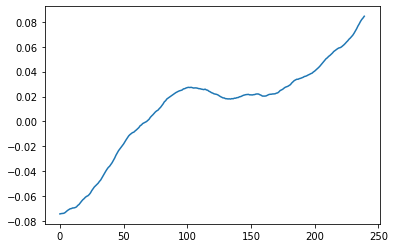

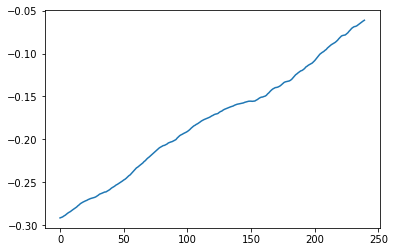

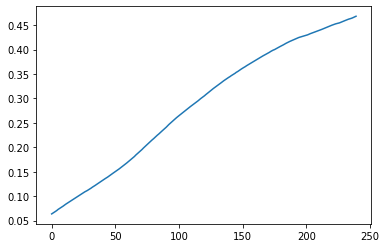

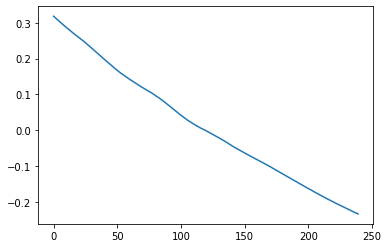

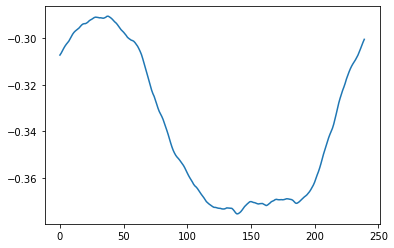

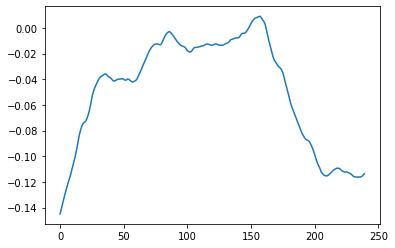

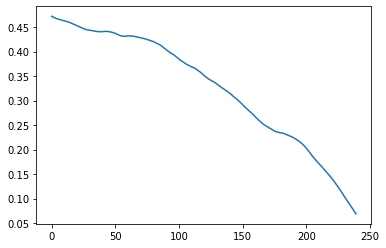

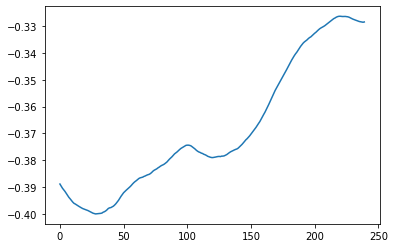

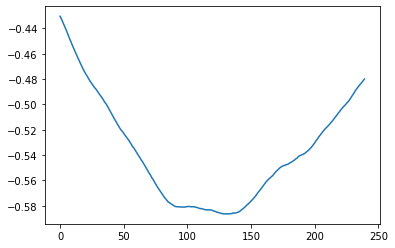

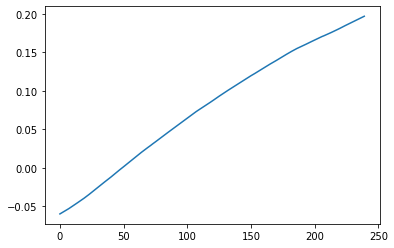

In [177]:

for j in range(4,20):
    st = j*60*20*30
    covs = []
    covs2 = []
    for i in range(0,60*4):
        i=i*20
        tslice=rTemp[st:st+20*60*30]
        qslice=rQ[st+i:st+20*60*30+i]
        tmask = (~np.isnan(tslice))&(~np.isnan(qslice))&(tslice>0)&(qslice>0)
        tslice=tslice[tmask]
        qslice=qslice[tmask]
        qslice=qslice-np.mean(qslice)
        tslice=tslice-np.mean(tslice)
        covs.append(np.cov(tslice,qslice)[0][1]/np.std(tslice)/np.std(qslice))
        covs2.append(cov2(tslice,qslice))
    plt.figure()
    plt.plot(covs)
    print(np.mean(covs))
    print(np.mean(covs2))
    print()

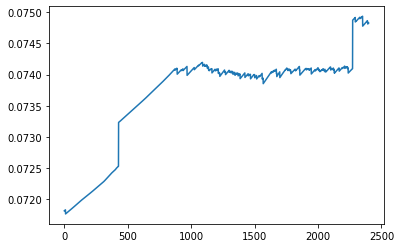

In [31]:
plt.plot(covs)

In [107]:
file='/home/tsw35/soteria/data/eddy_v2/L2/ABBY_L2.h5'
fp=h5py.File(file,'r')

/stor/soteria/hydro/private/tsw35/software/miniconda/envs/jenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/stor/soteria/hydro/private/tsw35/software/miniconda/envs/jenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/stor/soteria/hydro/private/tsw35/software/miniconda/envs/jenv/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.
/stor/soteria/hydro/private/tsw35/software/miniconda/envs/jenv/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in less
  after removing the cwd from sys.path.


(array([  38.,   30.,   47.,   42.,   43.,   53.,   52.,   83.,   80.,
         111.,  158.,  185.,  182.,  221.,  292.,  364.,  415.,  496.,
         634.,  856., 1129., 1509., 1861., 1573., 9932., 2446., 2000.,
        3561., 2053., 1007.,  723.,  575.,  523.,  454.,  396.,  342.,
         328.,  240.,  252.,  208.,  185.,  189.,  136.,  141.,  121.,
         121.,   90.,   81.,   90.,   86.]),
 array([-9.98896418e+00, -9.58919134e+00, -9.18941849e+00, -8.78964564e+00,
        -8.38987280e+00, -7.99009995e+00, -7.59032711e+00, -7.19055426e+00,
        -6.79078142e+00, -6.39100857e+00, -5.99123573e+00, -5.59146288e+00,
        -5.19169003e+00, -4.79191719e+00, -4.39214434e+00, -3.99237150e+00,
        -3.59259865e+00, -3.19282581e+00, -2.79305296e+00, -2.39328011e+00,
        -1.99350727e+00, -1.59373442e+00, -1.19396158e+00, -7.94188732e-01,
        -3.94415887e-01,  5.35695883e-03,  4.05129804e-01,  8.04902650e-01,
         1.20467550e+00,  1.60444834e+00,  2.00422119e+00,  2.403994

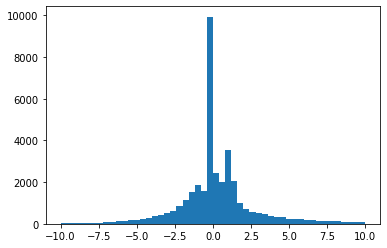

In [145]:
tq=fp['TQ'][:]
tq2=fp['TQ'][:]/fp['TSS_FILTER'][:]/fp['H2OS_FILTER'][:]
tq2=(tq2[(tq>-.2)&(tq<.2)])
tq2=tq2[(tq2>-10)&(tq2<10)]
plt.hist(tq2,50)

BART_L2.h5
SOAP_L2.h5
DELA_L2.h5
NIWO_L2.h5
MLBS_L2.h5
OSBS_L2.h5
WOOD_L2.h5
TREE_L2.h5
CLBJ_L2.h5
OAES_L2.h5
LENO_L2.h5
LAJA_L2.h5
TOOL_L2.h5
JERC_L2.h5
ORNL_L2.h5
TALL_L2.h5
DEJU_L2.h5
BLAN_L2.h5
SERC_L2.h5
SRER_L2.h5
SJER_L2.h5
KONZ_L2.h5
BONA_L2.h5
TEAK_L2.h5
GUAN_L2.h5
NOGP_L2.h5


/stor/soteria/hydro/private/tsw35/software/miniconda/envs/jenv/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()


RMNP_L2.h5
UNDE_L2.h5
DCFS_L2.h5
WREF_L2.h5
JORN_L2.h5
UKFS_L2.h5
STER_L2.h5
HEAL_L2.h5
STEI_L2.h5
BARR_L2.h5
GRSM_L2.h5
YELL_L2.h5
HARV_L2.h5
MOAB_L2.h5
SCBI_L2.h5
ABBY_L2.h5
DSNY_L2.h5
CPER_L2.h5
ONAQ_L2.h5
KONA_L2.h5


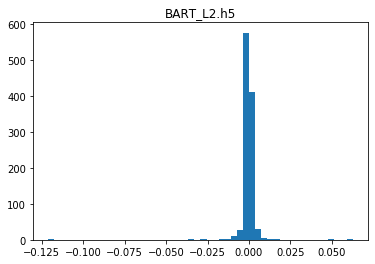

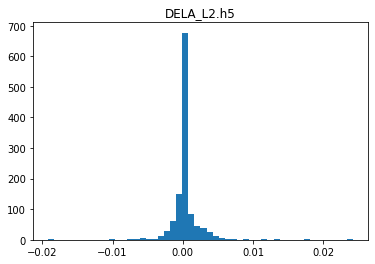

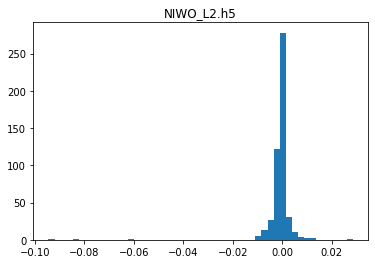

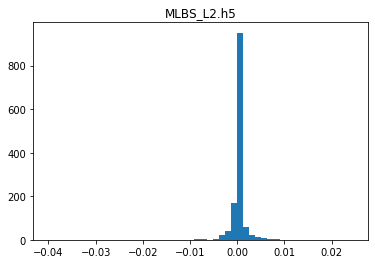

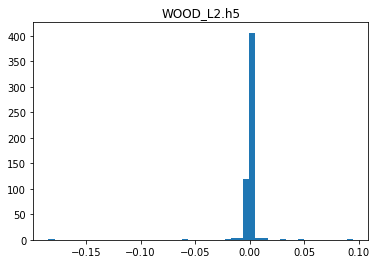

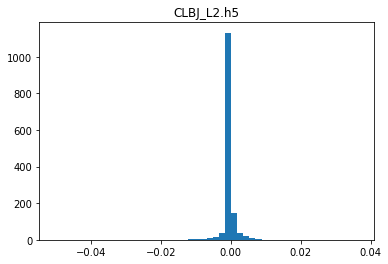

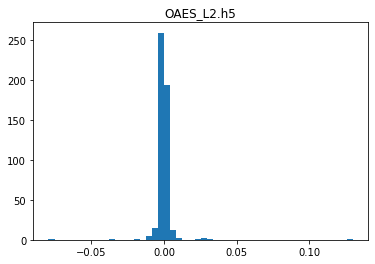

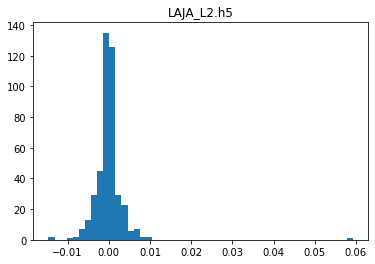

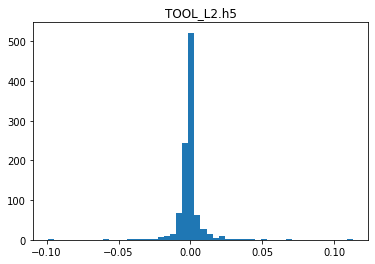

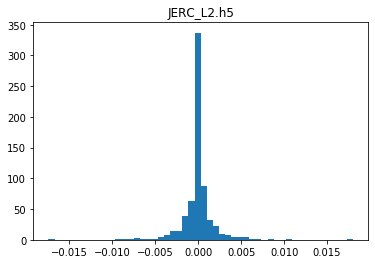

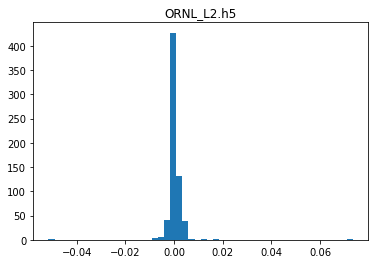

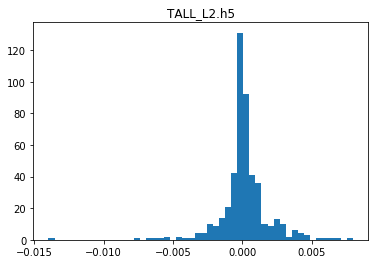

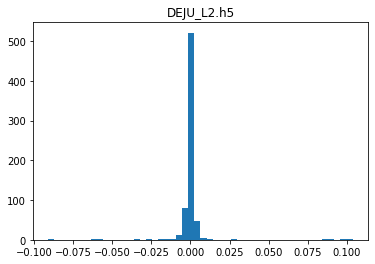

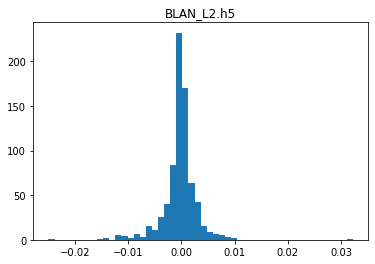

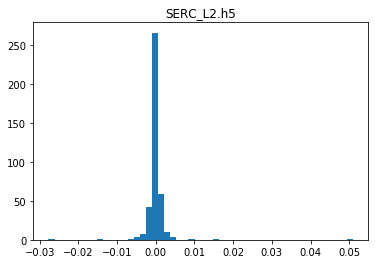

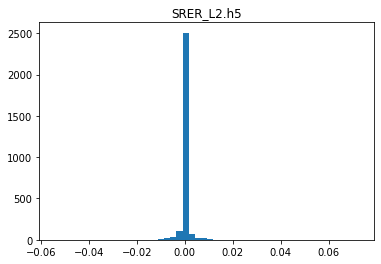

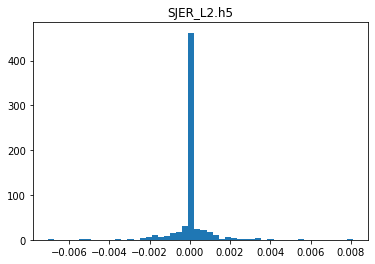

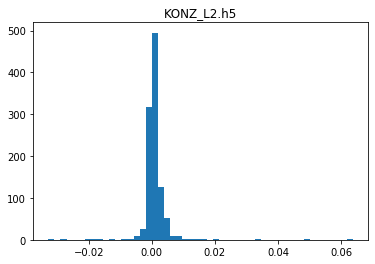

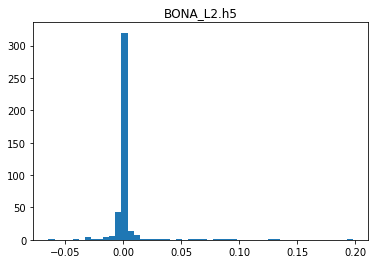

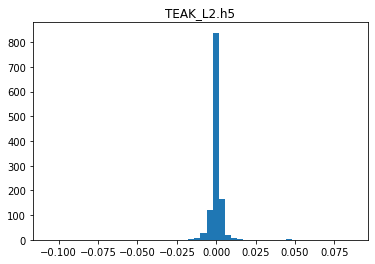

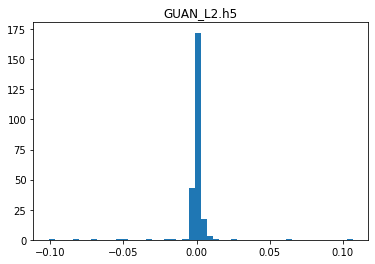

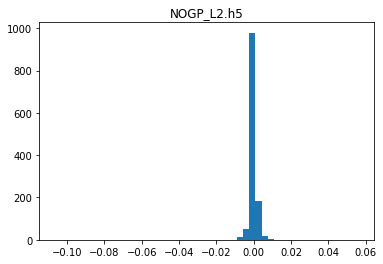

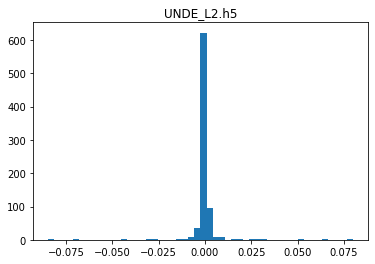

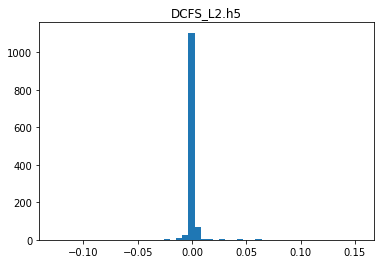

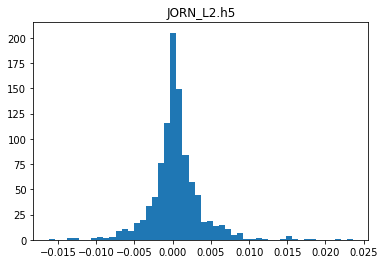

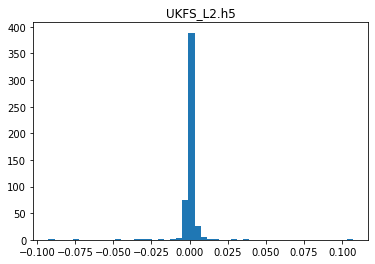

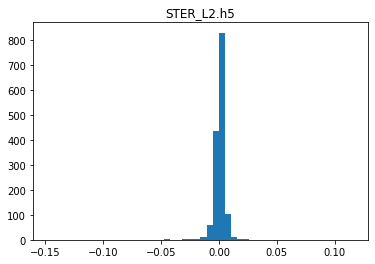

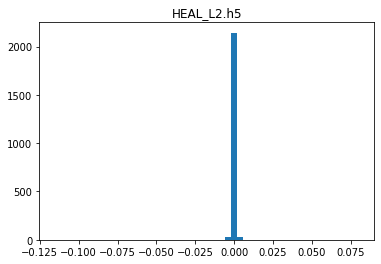

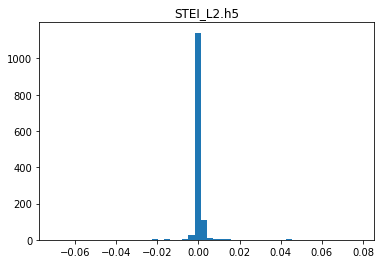

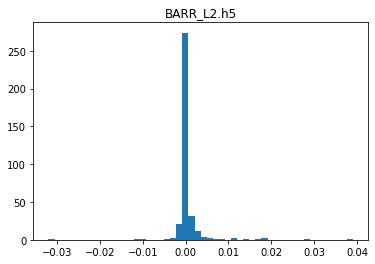

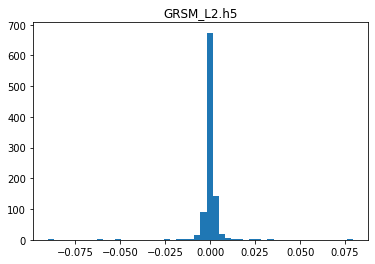

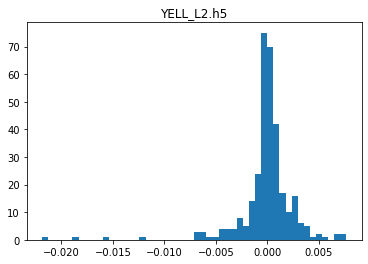

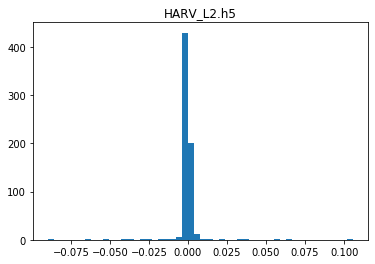

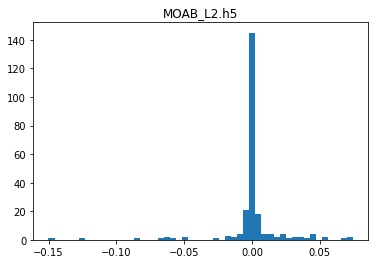

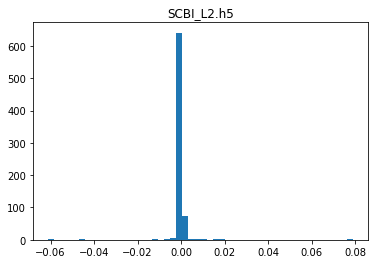

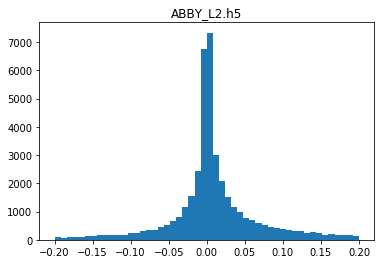

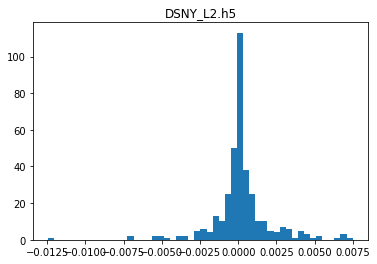

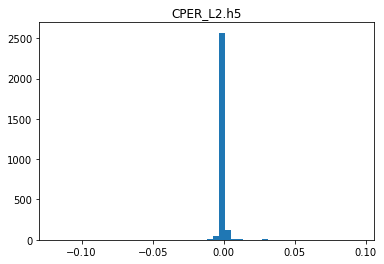

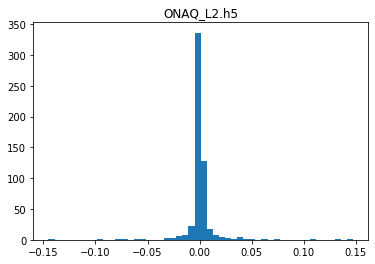

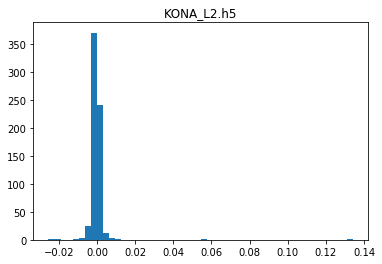

In [185]:
for file in os.listdir('/home/tsw35/soteria/data/eddy_v2/L2/'):
    print(file)
    fol='/home/tsw35/soteria/data/eddy_v2/L2/'
    fp=h5py.File(fol+file,'r')
    try:
        tq=fp['TQ'][:]
    except Exception:
        continue
    tq2=(tq[(tq>-.2)&(tq<.2)])
    tq2=tq2[(tq2>-10)&(tq2<10)]
    #tq2=fp['TQ'][:]/fp['TSS_FILTER'][:]/fp['H2OS_FILTER'][:]
    plt.figure()
    plt.hist(tq2,50)
    plt.title(file)

BART_L2.h5
SOAP_L2.h5


/stor/soteria/hydro/private/tsw35/software/miniconda/envs/jenv/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/stor/soteria/hydro/private/tsw35/software/miniconda/envs/jenv/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in greater
  # This is added back by InteractiveShellApp.init_path()


DELA_L2.h5
NIWO_L2.h5


/stor/soteria/hydro/private/tsw35/software/miniconda/envs/jenv/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


MLBS_L2.h5
OSBS_L2.h5
WOOD_L2.h5
TREE_L2.h5
CLBJ_L2.h5
OAES_L2.h5
LENO_L2.h5
LAJA_L2.h5
TOOL_L2.h5
JERC_L2.h5
ORNL_L2.h5
TALL_L2.h5
DEJU_L2.h5
BLAN_L2.h5
SERC_L2.h5
SRER_L2.h5
SJER_L2.h5
KONZ_L2.h5


/stor/soteria/hydro/private/tsw35/software/miniconda/envs/jenv/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  from ipykernel import kernelapp as app


BONA_L2.h5
TEAK_L2.h5
GUAN_L2.h5
NOGP_L2.h5
RMNP_L2.h5
UNDE_L2.h5
DCFS_L2.h5
WREF_L2.h5
JORN_L2.h5
UKFS_L2.h5
STER_L2.h5
HEAL_L2.h5
STEI_L2.h5
BARR_L2.h5
GRSM_L2.h5
YELL_L2.h5
HARV_L2.h5
MOAB_L2.h5
SCBI_L2.h5
ABBY_L2.h5
DSNY_L2.h5
CPER_L2.h5
ONAQ_L2.h5
KONA_L2.h5


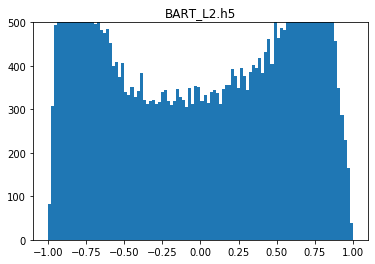

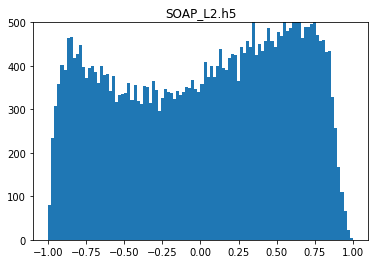

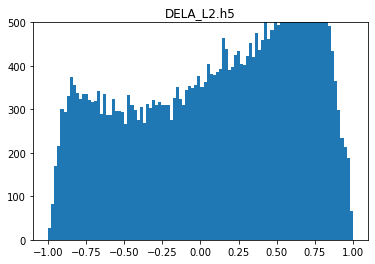

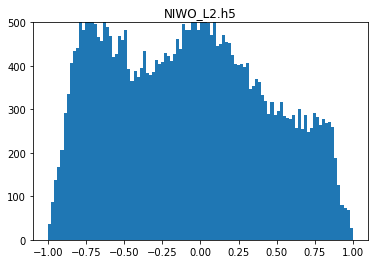

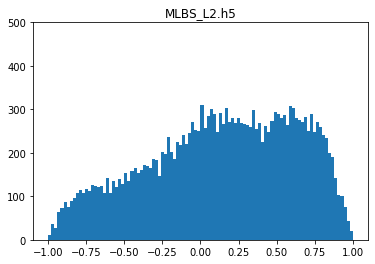

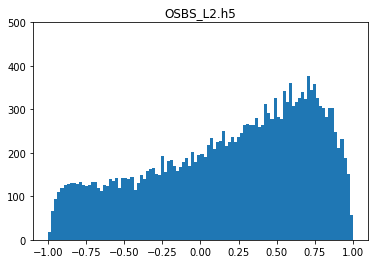

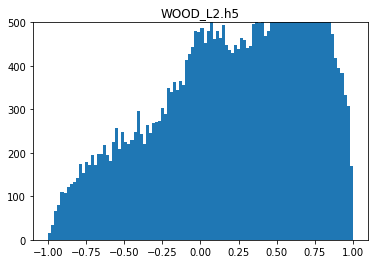

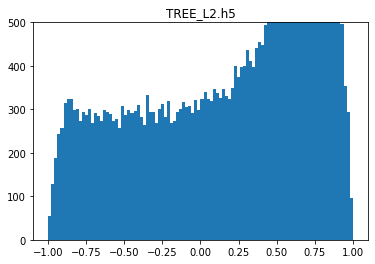

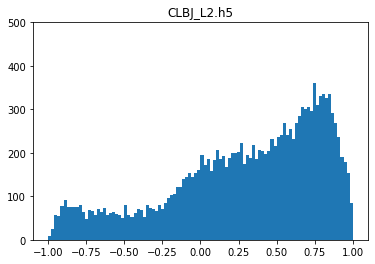

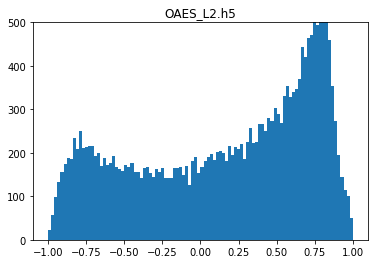

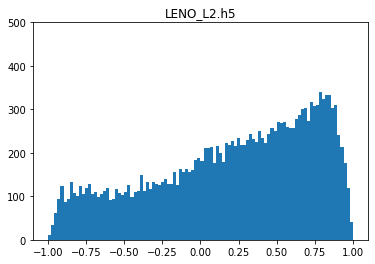

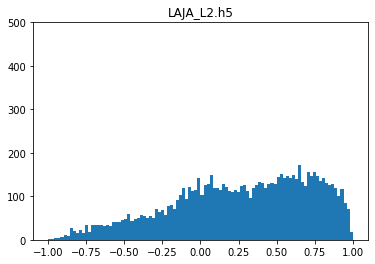

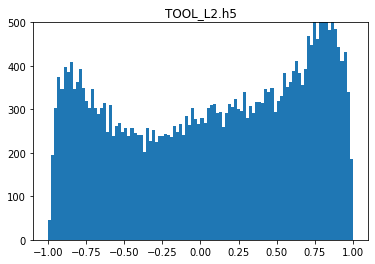

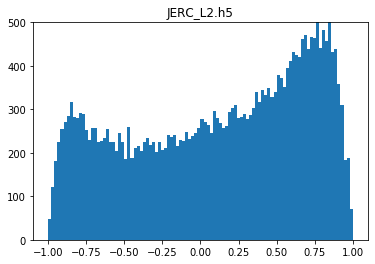

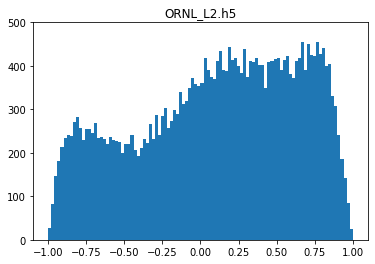

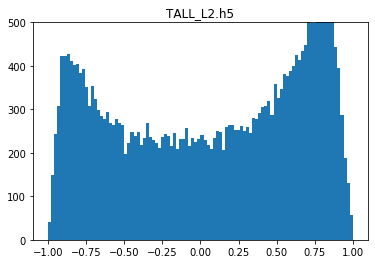

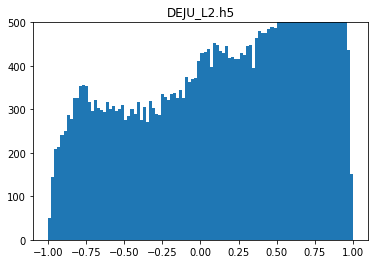

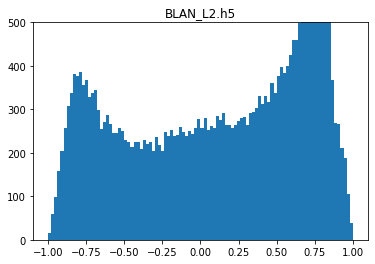

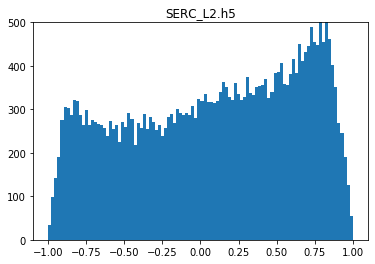

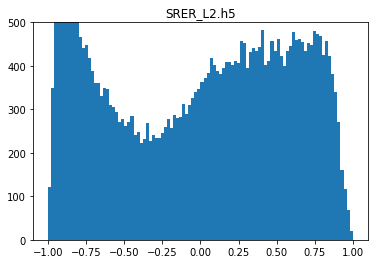

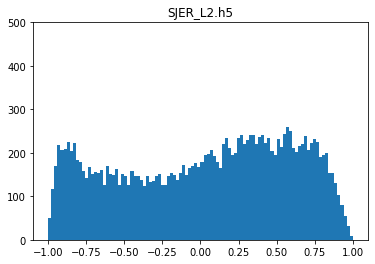

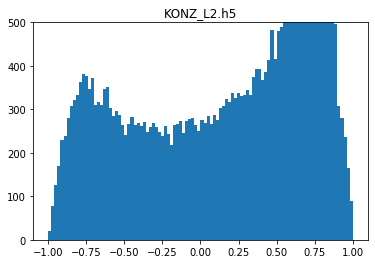

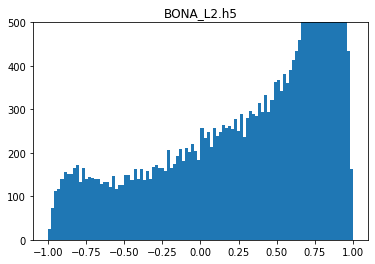

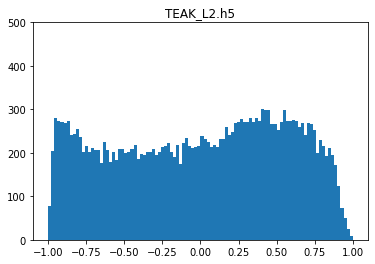

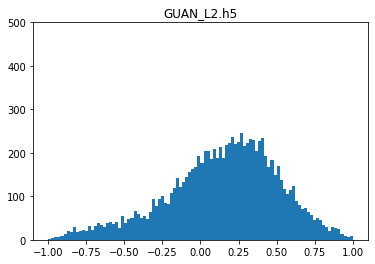

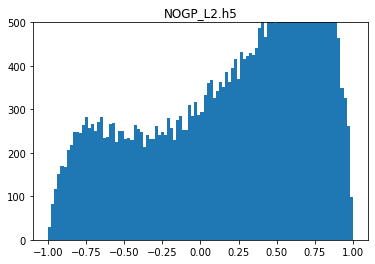

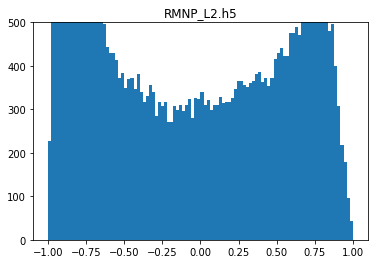

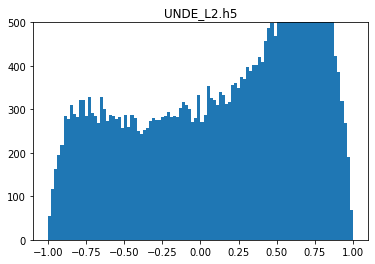

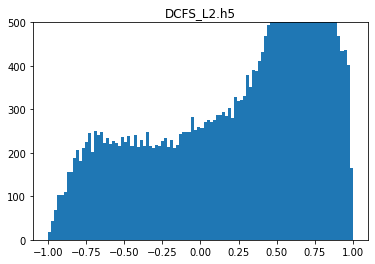

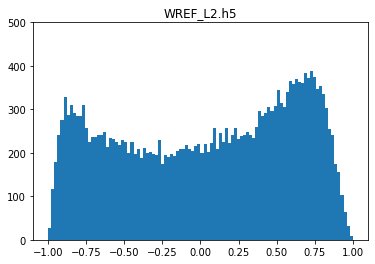

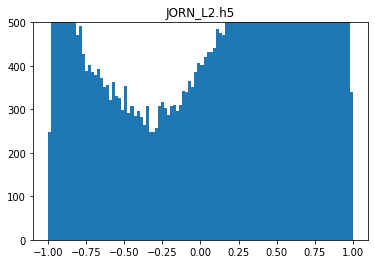

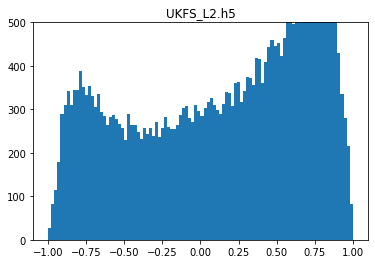

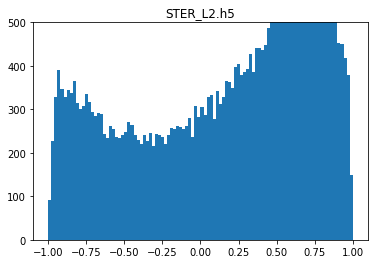

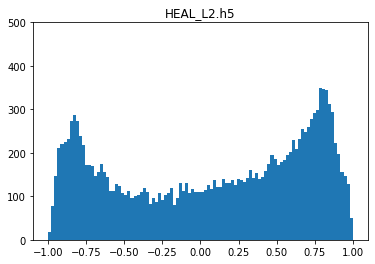

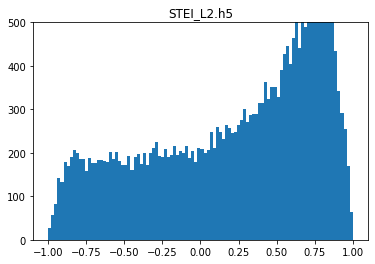

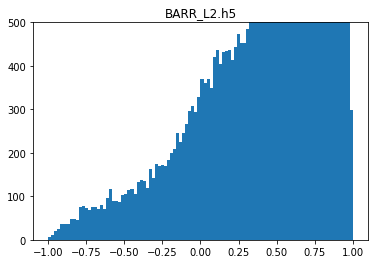

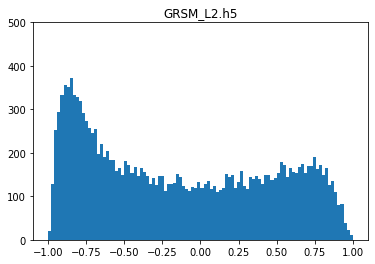

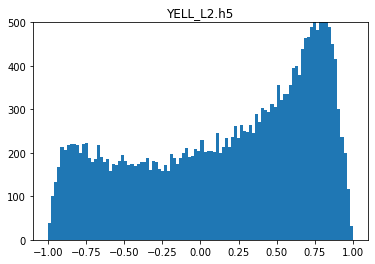

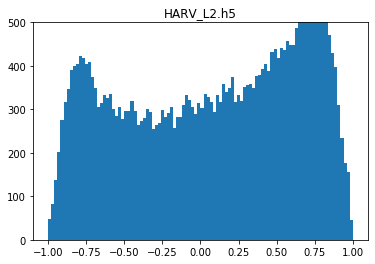

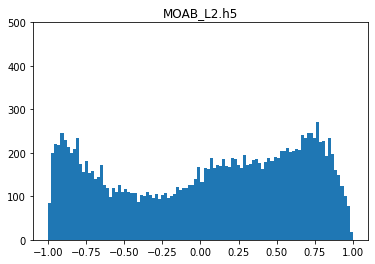

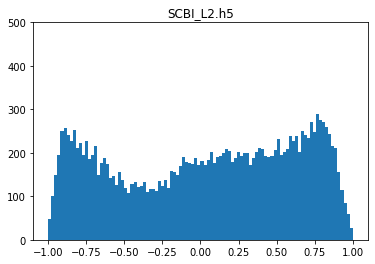

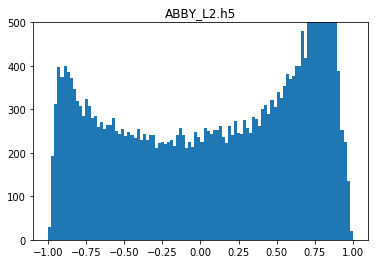

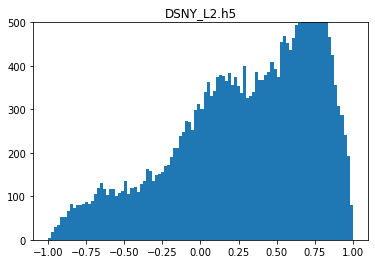

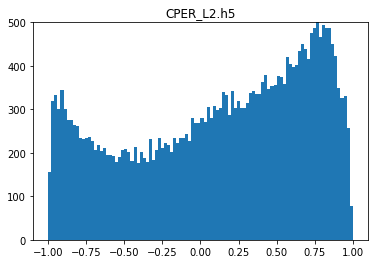

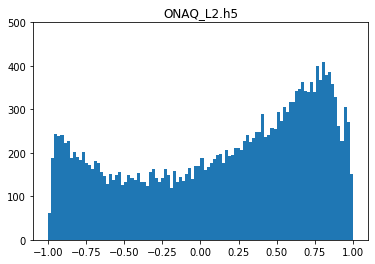

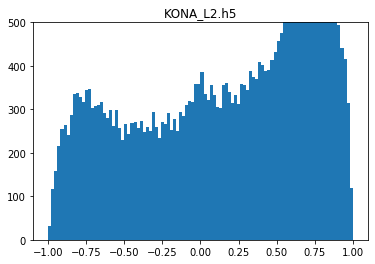

In [399]:
tqq = []
for file in os.listdir('/home/tsw35/soteria/data/eddy_v2/L2/'):
    print(file)
    fol='/home/tsw35/soteria/data/eddy_v2/L2/'
    fp=h5py.File(fol+file,'r')
    try:
        tq=fp['TQ'][:]
    except Exception:
        continue
    tq2=fp['TQ'][:]/fp['T_SONIC_SIGMA'][:]/fp['H2O_SIGMA'][:]
    tq2=tq2[(fp['T_SONIC_SIGMA'][:]>0) & (fp['H2O_SIGMA'][:]>0)]
    tqq.extend(tq2)
    #tq2=(tq2[(tq>-.1)&(tq<.1)])
    #tq2=tq2[(tq2>-10)&(tq2<10)]
    plt.figure()
    plt.hist(tq2,100,[-1,1])
    plt.ylim(0,500)
    plt.title(file)


Text(0.5, 1.0, 'all')

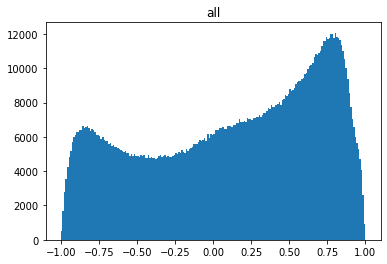

In [401]:
plt.figure()
plt.hist(tqq,200,[-1,1])
#plt.ylim(0,500*24)
plt.title('all')

In [187]:
fp.close()

In [147]:
np.mean(tq2)

0.25318518688851227

In [108]:
tqf=fp['TQ_FILTER'][:]
tq=fp['TQ'][:]
tqf[tqf<-1]=float('NaN')
tq[tq<-1]=float('NaN')

(-1, 1)

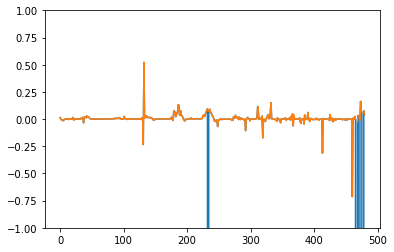

In [136]:
st = 48*500
plt.plot(tq[st:st+48*10])
plt.plot(tqf[st:st+48*10])
plt.ylim(-1,1)

(-1, 1)

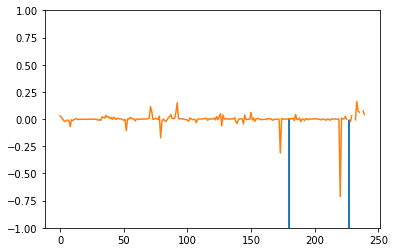

In [218]:
st = 48*505
plt.plot(tq[st:st+48*5])
plt.plot(tqf[st:st+48*5])
#plt.plot([st,st+48*5],[0,0])
plt.ylim(-1,1)

In [101]:
fp.close()

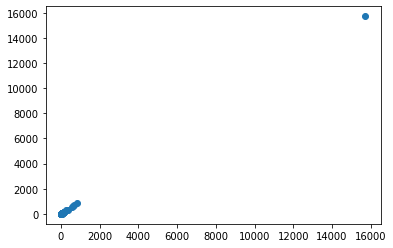

In [116]:
plt.scatter(tq,tqf)

In [174]:
import h5py
neon_dir   = '/home/tsw35/soteria/data/NEON/raw_data/'
sites={}
for site in os.listdir(neon_dir):
    if site == 'GUAN':
        continue
    sites[site]=[]
    print(site)
    d = 0
    for file in os.listdir(neon_dir+site):
        if d>0:
            for i in range(10):
                fp=h5py.File(neon_dir+site+'/'+file)
                try:
                    in_file_path='/'+site+'/dp01/data/h2oTurb/000_0'+str(i)+'0_30m/'
                    fp[in_file_path]['rtioMoleDryH2o']
                    d=i
                except Exception:
                    pass
        in_file_path='/'+site+'/dp01/h2oTurb/000_0'+str(d)+'0_30m/'
        sites[site].append(fp[in_file_path]['rtioMoleDryH2o'].attrs)
        
        

SJER


KeyError: 'Unable to open object (component not found)'

In [175]:
fp[in_file_path]#['rtioMoleDryH2o']

KeyError: 'Unable to open object (component not found)'

In [176]:
print(in_file_path)

/SJER/dp01/h2oTurb/000_000_30m/


In [188]:
print(os.getcwd())

/stor/soteria/hydro/private/tsw35/data/eddy_v2/neon_code/tests


In [192]:
qcdt = '/home/tsw35/soteria/proj_monin/data/QAQCv4_neon_pntEB0.2_day_rain_frez_BA_BL_CA_H_H2_H2_LA_SW_TC_TQ_TQ_TR_TS_T__US_VE_WS_ZL.h5'

In [193]:
fp = h5py.File(qcdt,'r')


In [376]:
fp = h5py.File(qcdt,'r')
TQ = fp['TQ'][:]
TQf= fp['TQ_FILTER'][:]
Ts = fp['T_SONIC_SIGMA'][:]
Hs = fp['H2O_SIGMA'][:]
Tsf = fp['TSS_FILTER'][:]
Hsf = fp['H2OS_FILTER'][:]

10.618372125051646


Text(0.5, 1.0, "T'q' unfiltered ... 11% below 0")

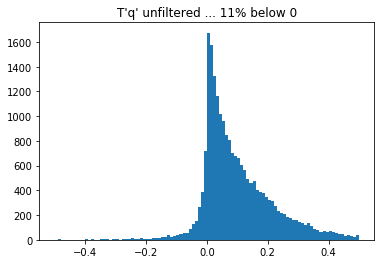

In [359]:
plt.hist(TQ,100,[-.5,.5])
print(np.sum(TQ<0)/len(TQ)*100)
plt.title("T'q' unfiltered ... 11% below 0")

6.679520727172565


Text(0.5, 1.0, "T'q' filtered ... 7% below 0")

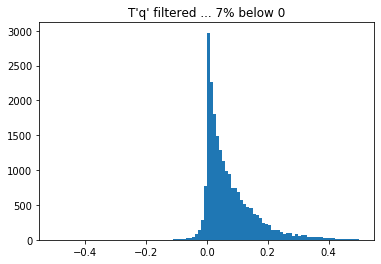

In [360]:
plt.hist(TQf,100,[-.5,.5])
print(np.sum(TQf<0)/len(TQf)*100)
plt.title("T'q' filtered ... 7% below 0")

11.089432369889742


Text(0.5, 1.0, "$T'q'/(\\sigma_T \\sigma_q)$ Unfiltered ... 11% negative")

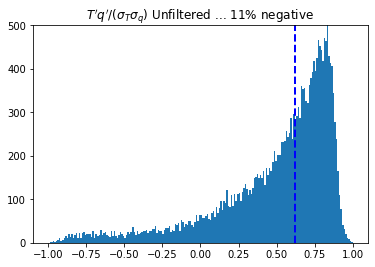

In [383]:
plt.hist(TQ2/Ts2/Hs2,200,[-1,1])
tqm = np.median(TQ2/Ts2/Hs2)
plt.plot([tqm,tqm],[0,500],'b--',linewidth=2)
print(np.sum(TQ2<0)/len(TQ2)*100,)
plt.ylim(0,500)
plt.title("$T'q'/(\sigma_T \sigma_q)$ Unfiltered ... 11% negative")

10.618372125051646


/stor/soteria/hydro/private/tsw35/software/miniconda/envs/jenv/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/stor/soteria/hydro/private/tsw35/software/miniconda/envs/jenv/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.0, "$T'q'/(\\sigma_T \\sigma_q)$ Filtered ... 7% negative")

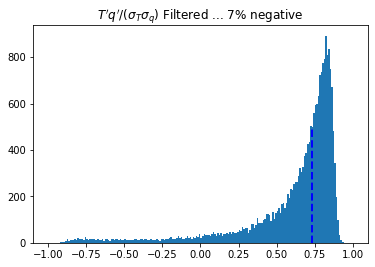

In [379]:
plt.hist(TQf/Tss/Hss,200,[-1,1])
tqm = np.nanmedian(TQf/Tss/Hss)
plt.plot([tqm,tqm],[0,500],'b--',linewidth=2)
print(np.sum(TQ<0)/len(TQ)*100,)
#plt.ylim(0,500)
plt.title("$T'q'/(\sigma_T \sigma_q)$ Filtered ... 7% negative")

In [ ]:
plt.hist(TQ/Ts/Hs,50,[-1,1])
tqm = np.median(TQ/Ts/Hs)
plt.plot([tqm,tqm],[0,2000],'b--',linewidth=2)
print(np.sum(TQ<0)/len(TQ)*100,)
plt.ylim(0,2000)
plt.title("$T'q'")

In [380]:
qcdt2 = '/home/tsw35/soteria/proj_monin/data/QAQCv4_neon_pntEB0.2_rain_frez_BA_BL_CA_H_H2_H2_LA_SW_TC_TQ_TQ_TR_TS_T__US_VE_WS_ZL.h5'

In [385]:
fp2 = h5py.File(qcdt2,'r')
TQ2 = fp2['TQ'][:]
TQf2= fp2['TQ_FILTER'][:]
Ts2 = fp2['T_SONIC_SIGMA'][:]
Hs2 = fp2['H2O_SIGMA'][:]
fp2.close()

11.089432369889742


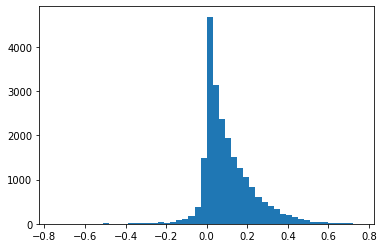

In [382]:
plt.hist(TQ2,50,[-.75,.75])
print(np.sum(TQ2<0)/len(TQ2)*100)

6.338513598195263


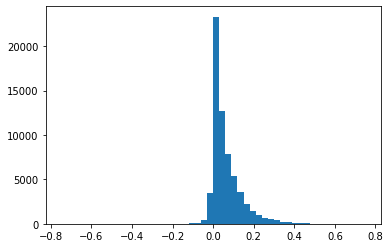

In [210]:
plt.hist(TQf2,50,[-.75,.75])
print(np.sum(TQf2<0)/len(TQf2)*100)

In [222]:
sites=[]
for i in fp['site']:
    if i not in sites:
        sites.append(i)

In [225]:
for site in sites:
    m=fp['site'][:]==site
    print(str(site)+': '+str(np.sum(m)))

b'BART': 1272
b'SOAP': 442
b'DELA': 921
b'NIWO': 247
b'MLBS': 530
b'OSBS': 411
b'WOOD': 327
b'TREE': 1080
b'CLBJ': 111
b'OAES': 384
b'LENO': 139
b'JERC': 1001
b'ORNL': 437
b'TALL': 636
b'BLAN': 321
b'SERC': 690
b'SRER': 774
b'SJER': 288
b'KONZ': 751
b'TEAK': 496
b'NOGP': 631
b'RMNP': 371
b'UNDE': 833
b'DCFS': 531
b'WREF': 712
b'JORN': 1197
b'UKFS': 459
b'STER': 1299
b'STEI': 465
b'GRSM': 335
b'YELL': 279
b'HARV': 322
b'MOAB': 210
b'SCBI': 286
b'ABBY': 612
b'DSNY': 592
b'CPER': 138
b'ONAQ': 437
b'KONA': 816


In [255]:
import datetime
print(datetime.datetime.fromtimestamp(1.5*10**9-6*60*60))

2017-07-13 16:40:00


In [272]:
timess=[]
for t in fp['TIME'][:]:
    timess.append(datetime.datetime.utcfromtimestamp(t-6*60*60).hour)
timess=np.array(timess)

In [300]:
h_Tqs=np.zeros((24,))
h_Tqs_low=np.zeros((24,))
h_Tqs_hi=np.zeros((24,))
for i in range(24):
    if len(TQ[timess==i])==0:
        h_Tqs_low[i]=0
        h_Tqs_hi[i]=0
        h_Tqs[i]=0
        continue
    h_Tqs[i]=np.mean(TQ[timess==i])
    h_Tqs_low[i]=np.percentile(TQ[timess==i],10)
    h_Tqs_hi[i]=np.percentile(TQ[timess==i],90)

In [301]:
len(timess)

21783

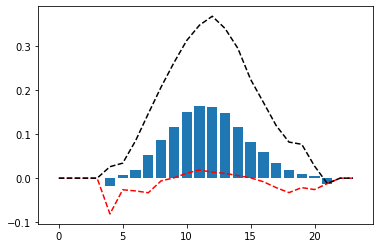

In [302]:
plt.bar(np.linspace(0,23,24),h_Tqs)
plt.plot(np.linspace(0,23,24),h_Tqs_low,'r--')
plt.plot(np.linspace(0,23,24),h_Tqs_hi,'k--')

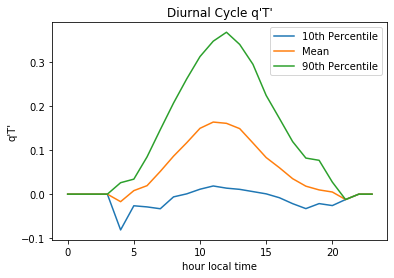

In [304]:
plt.plot(np.linspace(0,23,24),h_Tqs_low)
plt.plot(np.linspace(0,23,24),h_Tqs)
plt.plot(np.linspace(0,23,24),h_Tqs_hi)
plt.title("Diurnal Cycle q'T'")
plt.xlabel('hour local time')
plt.ylabel("q'T'")
plt.legend(['10th Percentile','Mean','90th Percentile'])

In [250]:
m = b'BART'==fp['site'][:]
day = 24*60*60
dd = 0
m = m&(fp['TIME'][:]>1.5*10**9+day*dd)&(fp['TIME'][:]<1.50*10**9+day*(dd+10))

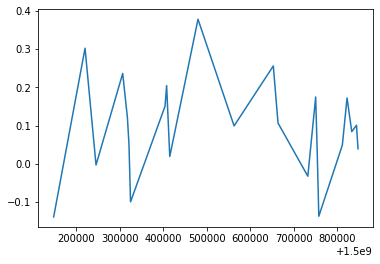

In [251]:
plt.plot(fp['TIME'][m],fp['TQ'][m])

In [305]:
# ------------------- #
# NLCD PREP NO FIGURE #
# ------------------- #
nlcd_dom = fp['nlcd_dom'][:]
sites =[]
fpsites = fp['site'][:]
npoints =0
apoints =0
nsites=0
asites=0
nlcds = {}
site_nlcds={}
nlcd_sums={}
site_nlcd_dom={}
i=0
for point in fpsites:
    if point not in sites:
        sites.append(point)
        site_nlcds[point]=[]
        for k in fp.keys():
            if 'nlcd' in str(k):
                if k=='nlcd_dom':
                    continue
                site_nlcds[point].append(fp[k][i])
                if str(k) not in nlcds.keys():
                    nlcds[str(k)]=[]
                    nlcd_sums[str(k)]=0
                nlcds[str(k)].append(fp[k][i])
                nlcd_sums[str(k)]=nlcd_sums[str(k)]+fp[k][i]
    if 'x-' in str(point):
        npoints=npoints+1
    else:
        apoints=apoints+1
    i = i+1
for site in sites:
    site_nlcd_dom[site]=nlcd_dom[fpsites==site][0]
    if 'x-' in str(site):
        nsites=nsites+1
    else:
        asites=asites+1
for k in nlcd_sums.keys():
    print(k+": "+str(nlcd_sums[k]))
class_names={11:'Water',12:'Snow',21:'Open Dev',22:'Low Dev',23:'Med Dev',24:'High Dev',31:'Barren',\
             41:'Decid.',42:'Everg.',43:'Mix Forest',51:'Dwarf Scrub',52:'Shrub',\
             71:'Grass',72:'AK:Sedge',73:'AK:Lichen',74:'AK:Moss',81:'Pasture',82:'Crops',90:'Wetland',95:'Herb Wet'}
class_colors={11:'royalblue',12:'whitesmoke',21:'pink',22:'lightcoral',23:'red',24:'maroon',31:'silver',\
              41:'limegreen',42:'darkgreen',43:'yellowgreen',51:'darkgoldenrod',52:'tan',\
              71:'wheat',72:'khaki',73:'darkkhaki',74:'darkseagreen',81:'gold',82:'sandybrown',90:'skyblue',95:'cadetblue'}
nlcd_labels=[]
nlcd_colors=[]
nlcd_tots=np.zeros((len(nlcds['nlcd21'],)),dtype='float')
start = 0

nlcd11: 0.15306122448979592
nlcd12: 0.0
nlcd21: 1.1423861438368208
nlcd22: 0.10714285714285715
nlcd23: 0.0
nlcd24: 0.0
nlcd31: 0.00510204081632653
nlcd41: 9.132659775908609
nlcd42: 6.844477917771645
nlcd43: 2.326530612244898
nlcd51: 0.0
nlcd52: 5.961433588056964
nlcd71: 5.93196050755666
nlcd72: 0.0
nlcd73: 0.0
nlcd74: 0.0
nlcd81: 2.0585106382978724
nlcd82: 2.4489795918367347
nlcd90: 2.7908163265306123
nlcd95: 0.09693877551020408


In [313]:
class_names={11:'Water',12:'Snow',21:'Open Dev',22:'Low Dev',23:'Med Dev',24:'High Dev',31:'Barren',\
             41:'Decid.',42:'Everg.',43:'Mix Forest',51:'Dwarf Scrub',52:'Shrub',\
             71:'Grass',72:'AK:Sedge',73:'AK:Lichen',74:'AK:Moss',81:'Pasture',82:'Crops',90:'Wetland',95:'Herb Wet'}
class_colors={11:'royalblue',12:'whitesmoke',21:'pink',22:'lightcoral',23:'red',24:'maroon',31:'silver',\
              41:'limegreen',42:'darkgreen',43:'yellowgreen',51:'darkgoldenrod',52:'tan',\
              71:'wheat',72:'khaki',73:'darkkhaki',74:'darkseagreen',81:'gold',82:'sandybrown',90:'skyblue',95:'cadetblue'}
nlcd_labels=[]
nlcd_colors=[]

In [309]:
nlcds=fp['nlcd_dom'][:]
print(nlcds[0])

41.0


In [366]:
nlcd_e =[]
names=[]
colors=[]
for i in nlcds:
    if i not in nlcd_e:
        nlcd_e.append(i)
        names.append(class_names[i])
        colors.append(class_colors[i])
means=[]
lows = []
his  =[]
for i in nlcd_e:
    m=i==nlcds
    means.append(np.mean(TQ[m]))
    lows.append(np.percentile(TQ[m],25))
    his.append(np.percentile(TQ[m],75))


Text(0, 0.5, "q'T'")

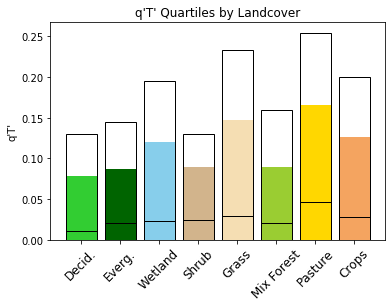

In [367]:
plt.bar(names,means,color=colors)
plt.bar(names,lows,color=colors,fill=False)
plt.bar(names,his,color=colors,fill=False)
plt.xticks(rotation=45,fontsize=12)
plt.title("q'T' Quartiles by Landcover")
plt.ylabel("q'T'")